# Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Read Dataset

In [4]:
df = pd.read_csv('/content/MarketPricePrediction.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [6]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [7]:
df_encoded = pd.get_dummies(df, columns=['market', 'month', 'state', 'city'], drop_first=True)


In [8]:
df_encoded.head()

,year,quantity,priceMin,priceMax,priceMod,date,market_AGRA(UP),market_AHMEDABAD(GUJ),market_AHMEDNAGAR(MS),market_AJMER(RAJ),...,city_SRIGANGANAGAR,city_SRINAGAR,city_SRIRAMPUR,city_SURAT,city_TRIVENDRUM,city_UDAIPUR,city_UJJAIN,city_VANI,city_VARANASI,city_YEOLA
0,2005,2350,404,493,446,January-2005,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2006,900,487,638,563,January-2006,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010,790,1283,1592,1460,January-2010,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,245,3067,3750,3433,January-2011,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2012,1035,523,686,605,January-2012,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# EDA

In [9]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [11]:
df['date'] = pd.to_datetime(df['date'])


<ipython-input-11-e8d2d516eb0e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [12]:
df.set_index('date', inplace=True)


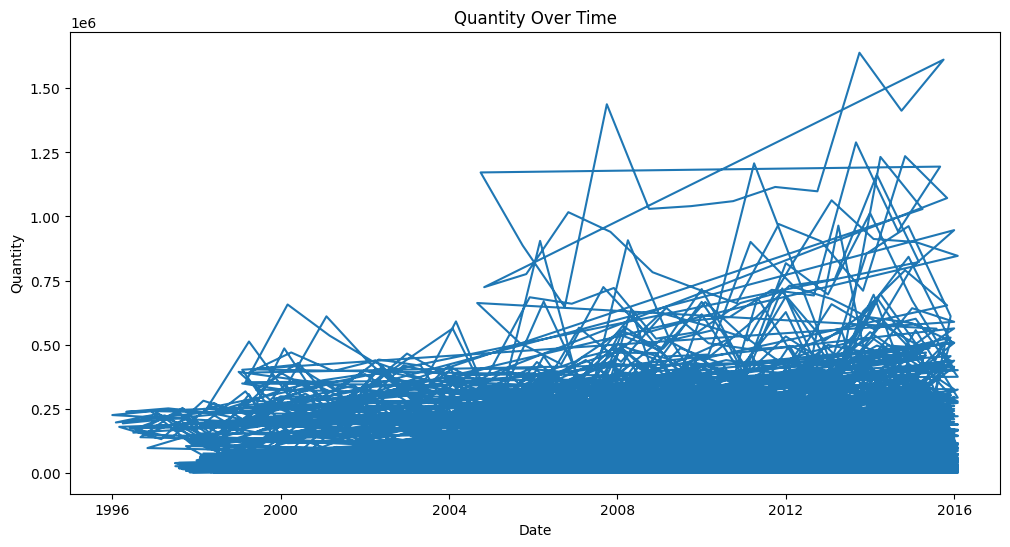

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['quantity'])
plt.title('Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

In [15]:
df['month'] = df.index.month
df['year'] = df.index.year


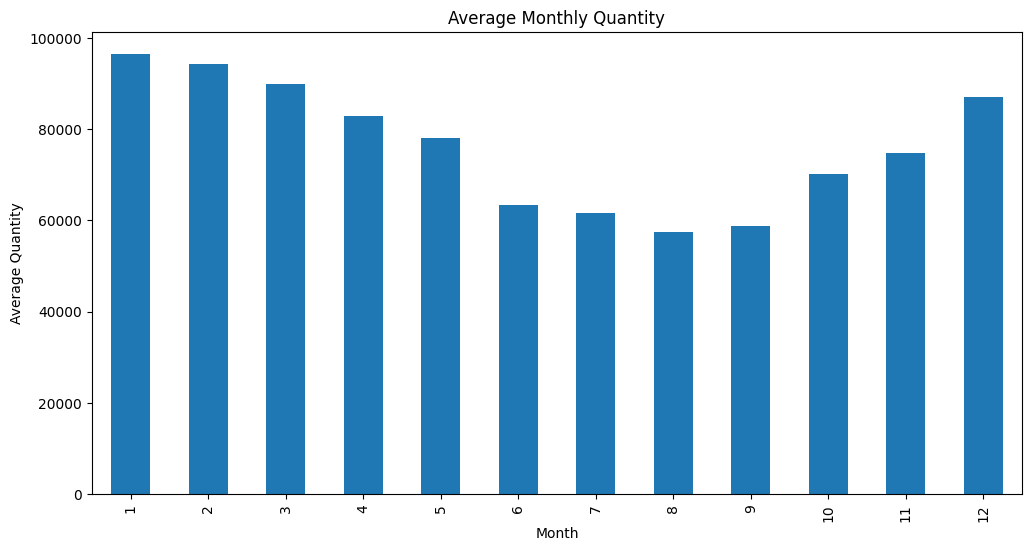

In [16]:
monthly_avg = df.groupby('month')['quantity'].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Quantity')
plt.xlabel('Month')
plt.ylabel('Average Quantity')
plt.show()

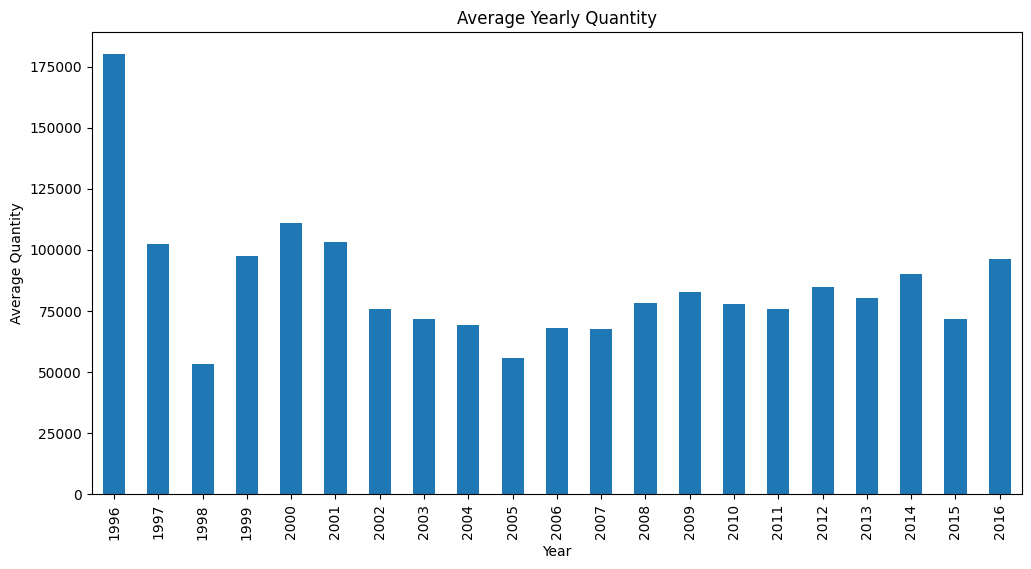

In [17]:
yearly_avg = df.groupby('year')['quantity'].mean()
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='bar')
plt.title('Average Yearly Quantity')
plt.xlabel('Year')
plt.ylabel('Average Quantity')
plt.show()

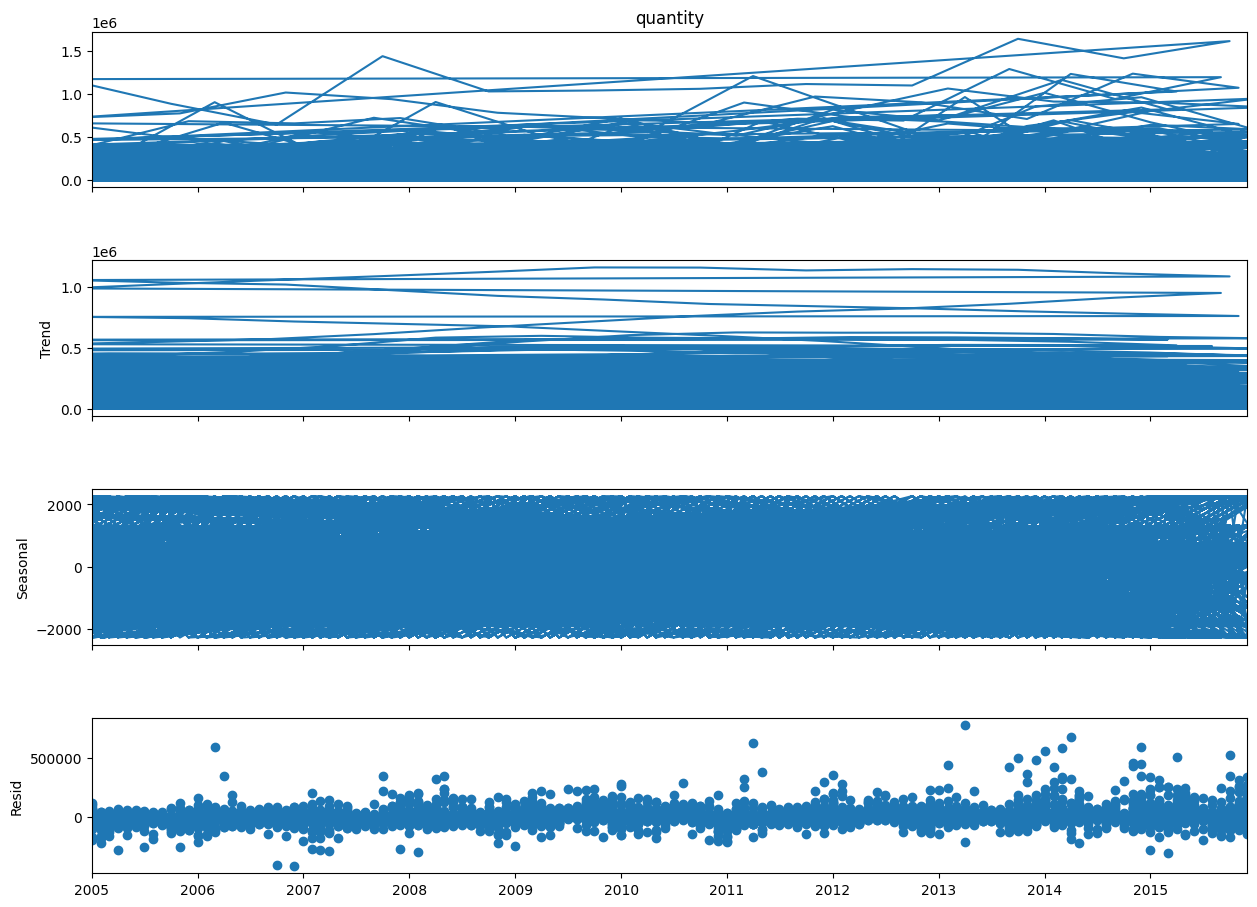

In [19]:
decomposition = sm.tsa.seasonal_decompose(df['quantity'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

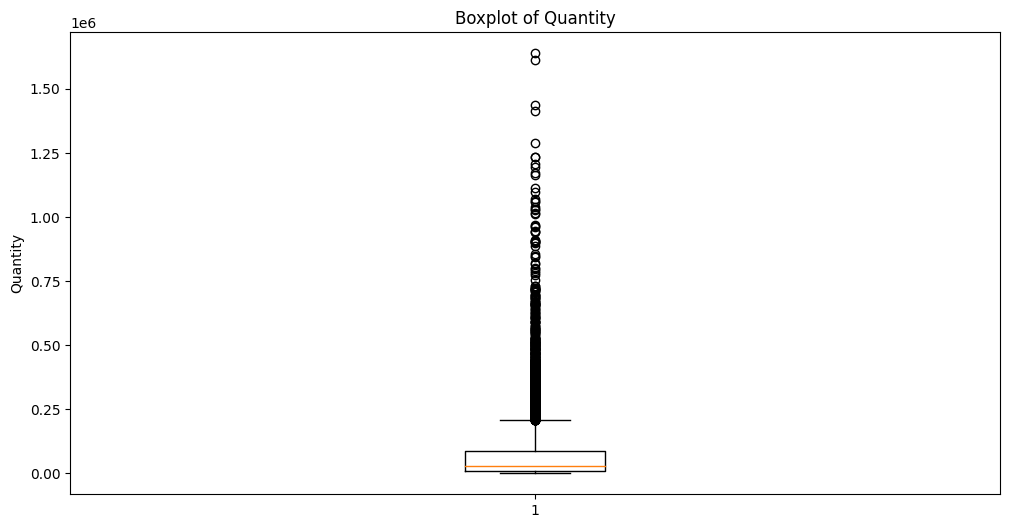

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['quantity'])
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')
plt.show()

In [21]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1


In [24]:
outliers = df[(df['quantity'] < (Q1 - 1.5 * IQR)) | (df['quantity'] > (Q3 + 1.5 * IQR))]
print(outliers)

                    market  month  year  quantity  priceMin  priceMax  \
date                                                                    
2009-01-01  AHMEDNAGAR(MS)      1  2009    244158       363      1831   
2014-01-01  AHMEDNAGAR(MS)      1  2014    380582       108      1283   
2015-01-01  AHMEDNAGAR(MS)      1  2015    368770       100      1921   
2016-01-01  AHMEDNAGAR(MS)      1  2016    208751       175      1722   
2014-02-01  AHMEDNAGAR(MS)      2  2014    371458       100       836   
...                    ...    ...   ...       ...       ...       ...   
2009-04-01       YEOLA(MS)      4  2009    209100       305       505   
2010-07-01       YEOLA(MS)      7  2010    225557       310       728   
2007-12-01       YEOLA(MS)     12  2007    232281       250       478   
2013-12-01       YEOLA(MS)     12  2013    215883       472      1427   
2015-12-01       YEOLA(MS)     12  2015    223315       609      1446   

            priceMod state        city  
date     

# Feature Engineering

In [25]:
df['quantity_lagged_3'] = df['quantity'].shift(3)

In [26]:
df['rolling_mean_7'] = df['quantity'].rolling(window=7).mean()

df['rolling_std_30'] = df['quantity'].rolling(window=30).std()


In [29]:
df['month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.index.month / 12)

# Prophet

In [32]:
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'quantity': 'y'})


In [33]:
model_prophet = Prophet()
model_prophet.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9mx61pcf/q5l1ywu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9mx61pcf/a4oa02k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25345', 'data', 'file=/tmp/tmp9mx61pcf/q5l1ywu6.json', 'init=/tmp/tmp9mx61pcf/a4oa02k7.json', 'output', 'file=/tmp/tmp9mx61pcf/prophet_modelukln_nzh/prophet_model-20240530152439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

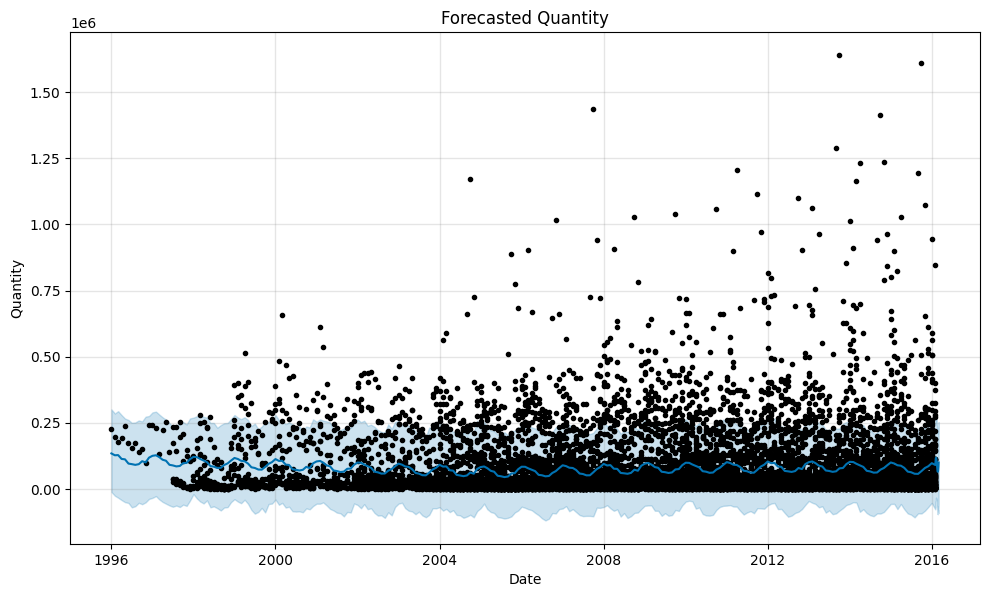

In [35]:
model_prophet.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Quantity')
plt.show()

# Model Evaluation

In [37]:
forecasted_values = forecast[['ds', 'yhat']].set_index('ds')['yhat']

actual_values = df_prophet.set_index('ds')['y']

In [39]:
print("Actual Values Shape:", actual_values.shape)
print("Forecasted Values Shape:", forecasted_values.shape)

Actual Values Shape: (10227,)
Forecasted Values Shape: (272,)


In [43]:
actual_values_subset = actual_values[:272]


In [44]:
mae = mean_absolute_error(actual_values_subset, forecasted_values)
mse = mean_squared_error(actual_values_subset, forecasted_values)
rmse = np.sqrt(mse)

In [45]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 56324.633898148386
Mean Squared Error (MSE): 4334447350.935225
Root Mean Squared Error (RMSE): 65836.5198877889


# Validation

In [46]:
model_prophet = Prophet(seasonality_mode='multiplicative')
model_prophet.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9mx61pcf/4em2da0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9mx61pcf/_cgyb0cg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64021', 'data', 'file=/tmp/tmp9mx61pcf/4em2da0f.json', 'init=/tmp/tmp9mx61pcf/_cgyb0cg.json', 'output', 'file=/tmp/tmp9mx61pcf/prophet_modelbbkkzeik/prophet_model-20240530153511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
unseen_data = df_prophet.tail(30)

forecast_unseen = model_prophet.predict(unseen_data[['ds']])

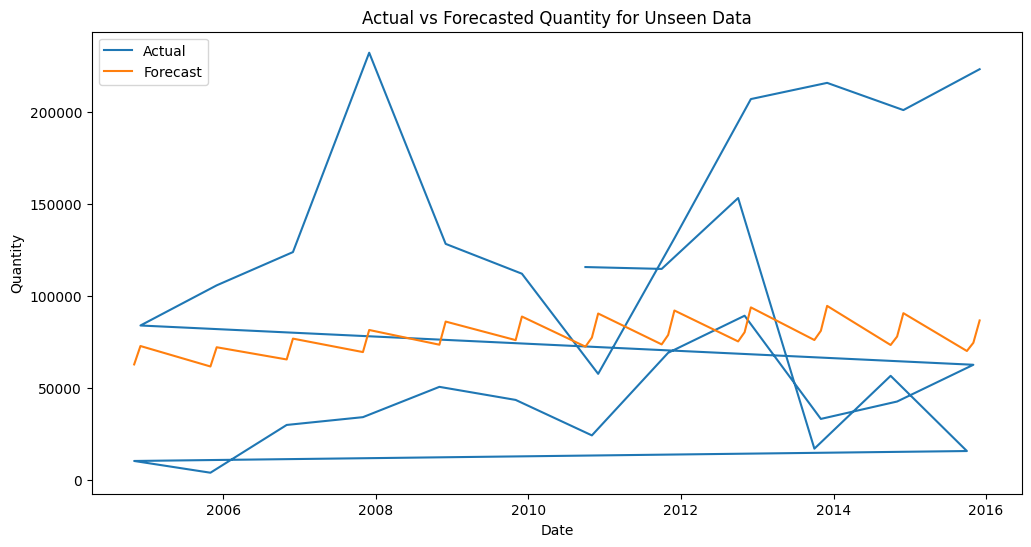

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(unseen_data['ds'], unseen_data['y'], label='Actual')
plt.plot(forecast_unseen['ds'], forecast_unseen['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Forecasted Quantity for Unseen Data')
plt.legend()
plt.show()